## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)



### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [4]:
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [5]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [7]:
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [8]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [9]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")
bitstamp
bitstamp.dtypes

/Users/benharrington/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].astype('float')
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()

coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [13]:
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
coinbase
coinbase.dtypes

/Users/benharrington/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [14]:
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].astype('float')
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [15]:
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [16]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:,[3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head(10)

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00
2018-01-01 00:05:00,13610.00
2018-01-01 00:06:00,13600.56
2018-01-01 00:07:00,13580.00
2018-01-01 00:08:00,13579.00


In [17]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:,[3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head(10)

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44
2018-01-01 00:05:00,13564.35
2018-01-01 00:06:00,13539.00
2018-01-01 00:07:00,13511.02
2018-01-01 00:08:00,13528.52


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [18]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [19]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitcoin'}, xlabel='Timestamp'>

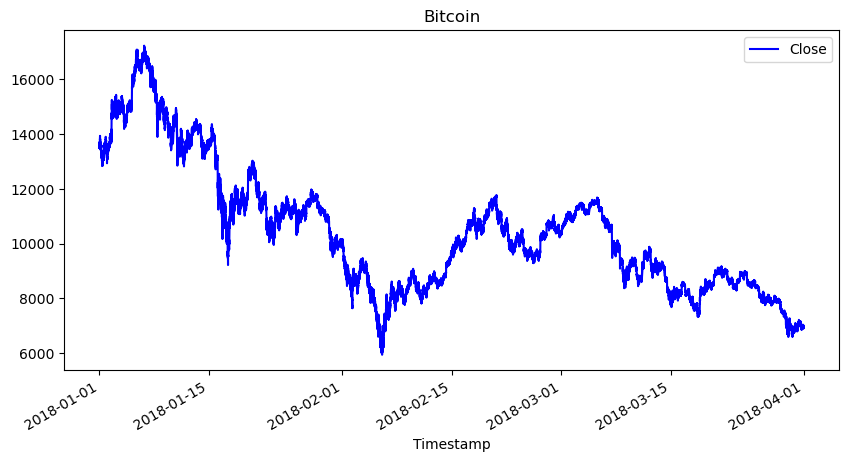

In [20]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(10, 5), title="Bitcoin", color="blue")

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

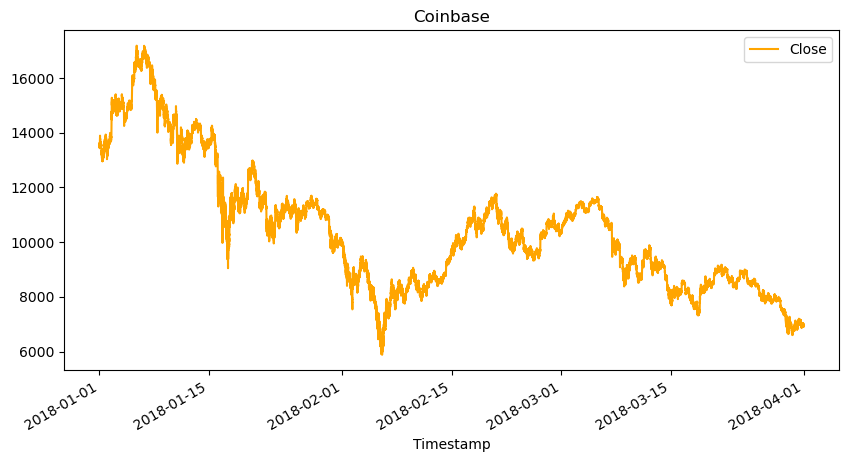

In [21]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(10, 5), title="Coinbase", color="orange")

<AxesSubplot:title={'center':'Bitcoin and Coinbase Overlay Plot'}, xlabel='Timestamp'>

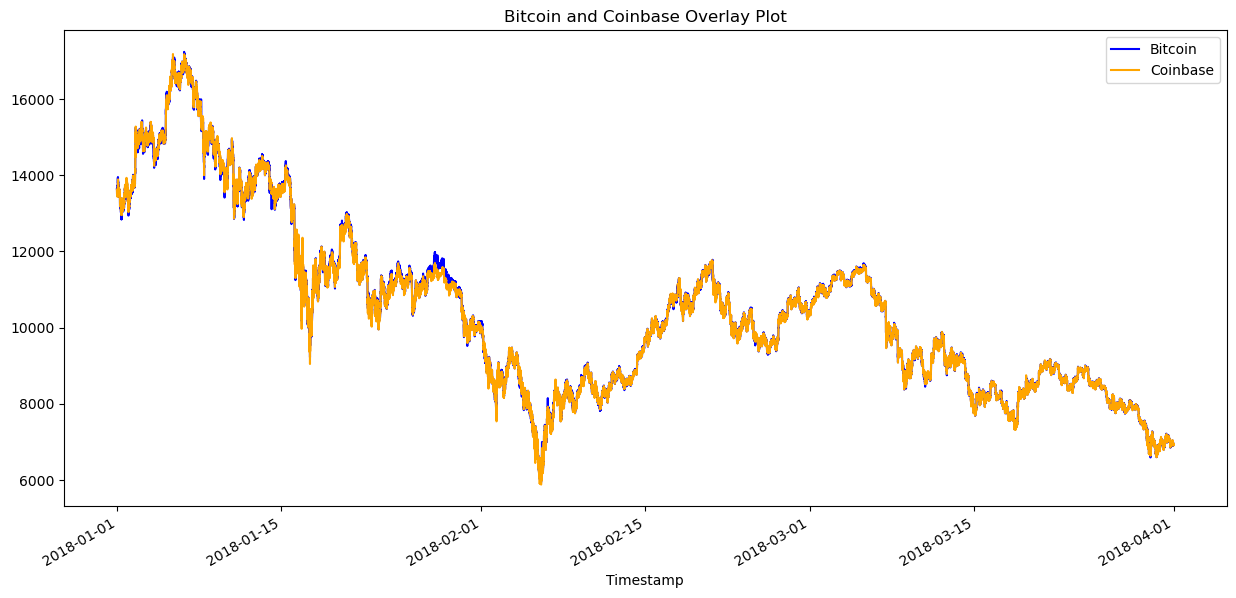

In [22]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 7), title="Bitcoin and Coinbase Overlay Plot", color="blue", label="Bitcoin")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Bitcoin and Coinbase Overlay Plot for Feb 2018'}, xlabel='Timestamp'>

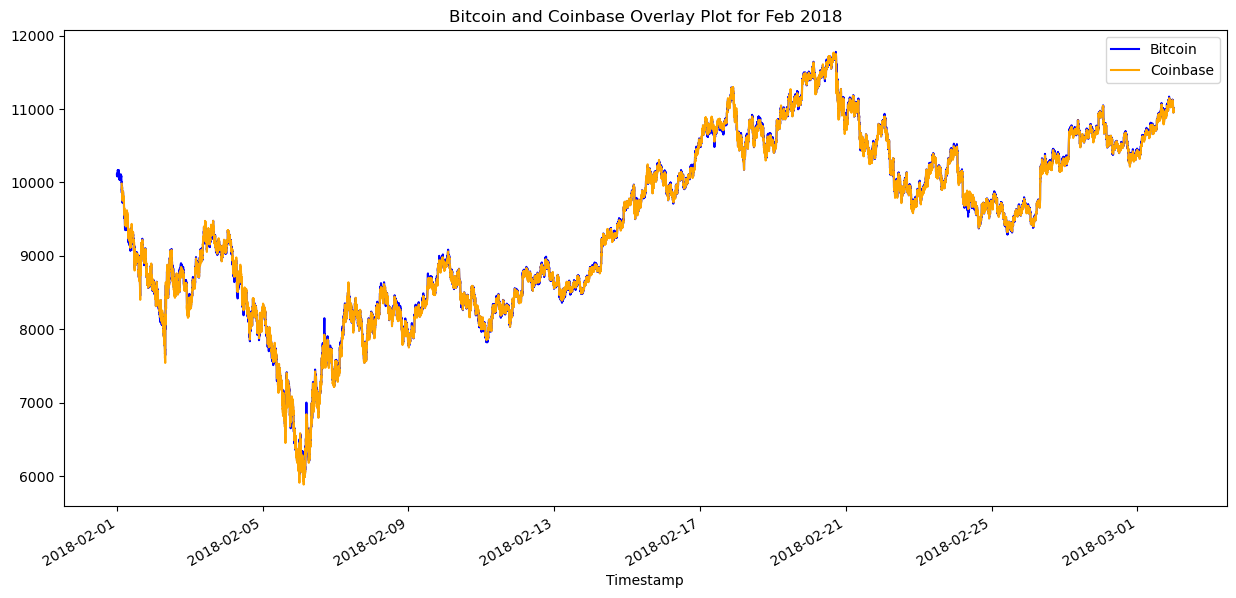

In [23]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].loc['2018-02-01':'2018-03-01'].plot(legend=True, figsize=(15, 7), 
                title="Bitcoin and Coinbase Overlay Plot for Feb 2018", color="blue", label="Bitcoin")
coinbase_sliced['Close'].loc['2018-02-01':'2018-03-01'].plot(legend=True, figsize=(15, 7), 
                                color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Bitcoin and Coinbase Overlay Plot for March 2018'}, xlabel='Timestamp'>

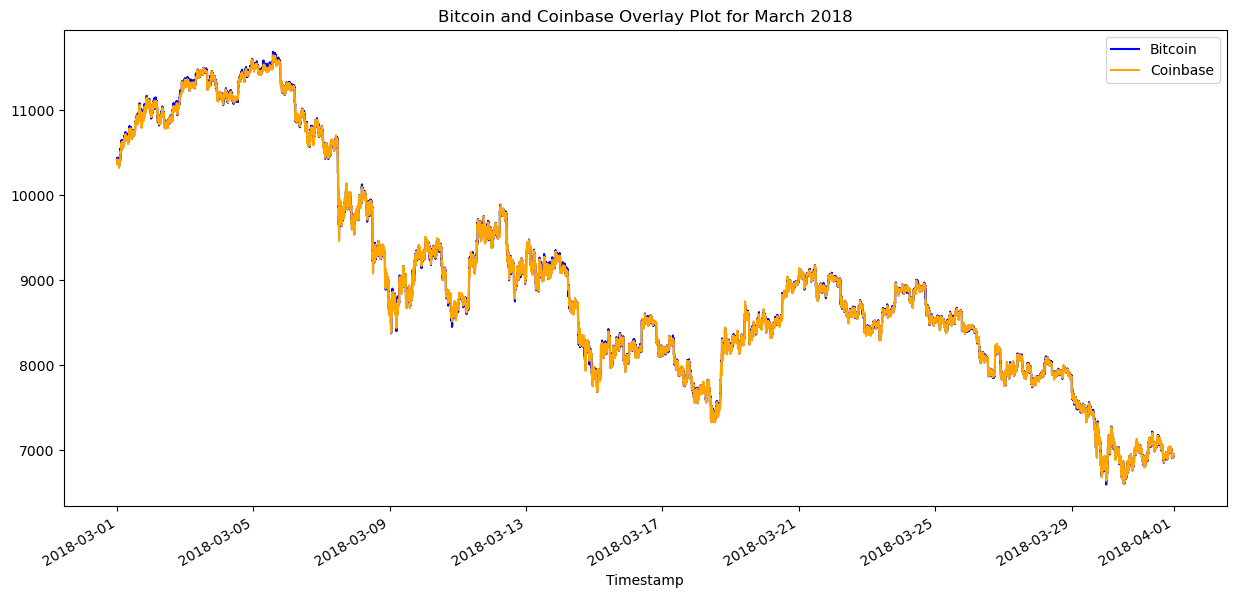

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced['Close'].loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(15, 7), 
                title="Bitcoin and Coinbase Overlay Plot for March 2018", color="blue", label="Bitcoin")
coinbase_sliced['Close'].loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(15, 7), 
                                color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The two dataframes seem to deviate a little, Coinbase seems to be below Bitcoin most of the time. There could be a fee involved for coinbase transactions which could be reducing the total bitcoin the user receives. However, the overall spread is closing or becoming less over time.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitcoin and Coinbase Overlay Plot for Januray 5th'}, xlabel='Timestamp'>

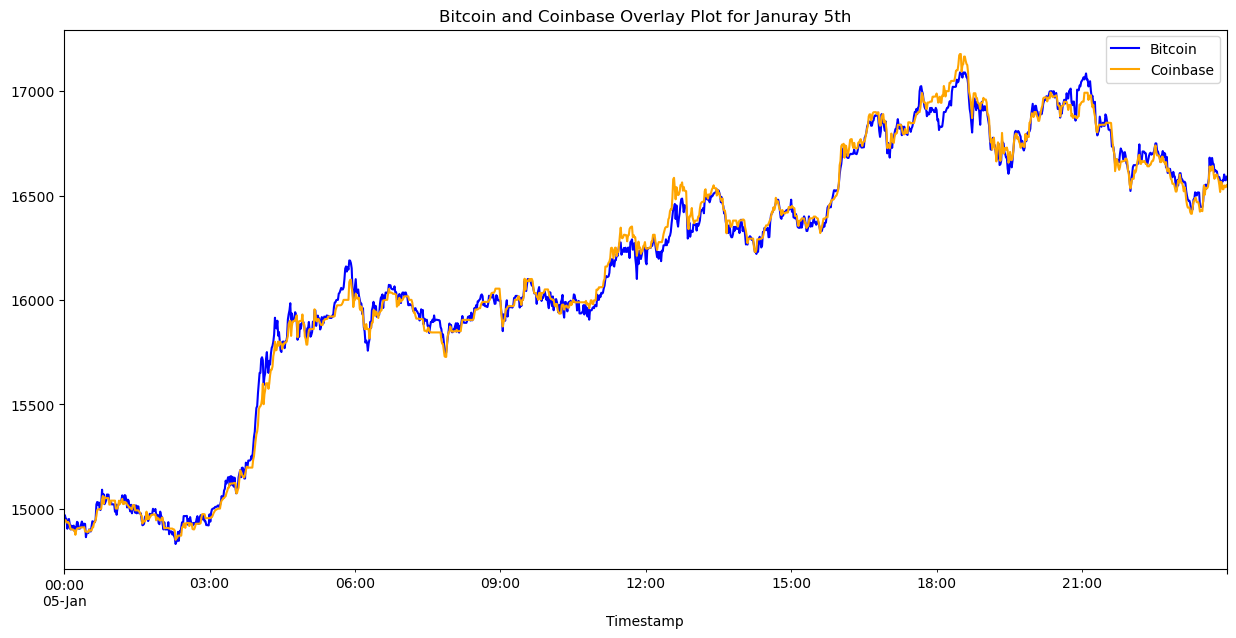

In [25]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-01-05'].plot(legend=True, figsize=(15, 7), 
                title="Bitcoin and Coinbase Overlay Plot for Januray 5th", color="blue", label="Bitcoin")
coinbase_sliced['Close'].loc['2018-01-05'].plot(legend=True, figsize=(15, 7), 
                                color="orange", label="Coinbase")

In [26]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced['Close'].loc['2018-01-05'] - coinbase_sliced['Close'].loc['2018-01-05']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       -0.650535
std        44.027768
min      -150.850000
25%       -26.000000
50%         0.055000
75%        24.477500
max       216.930000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date'}>

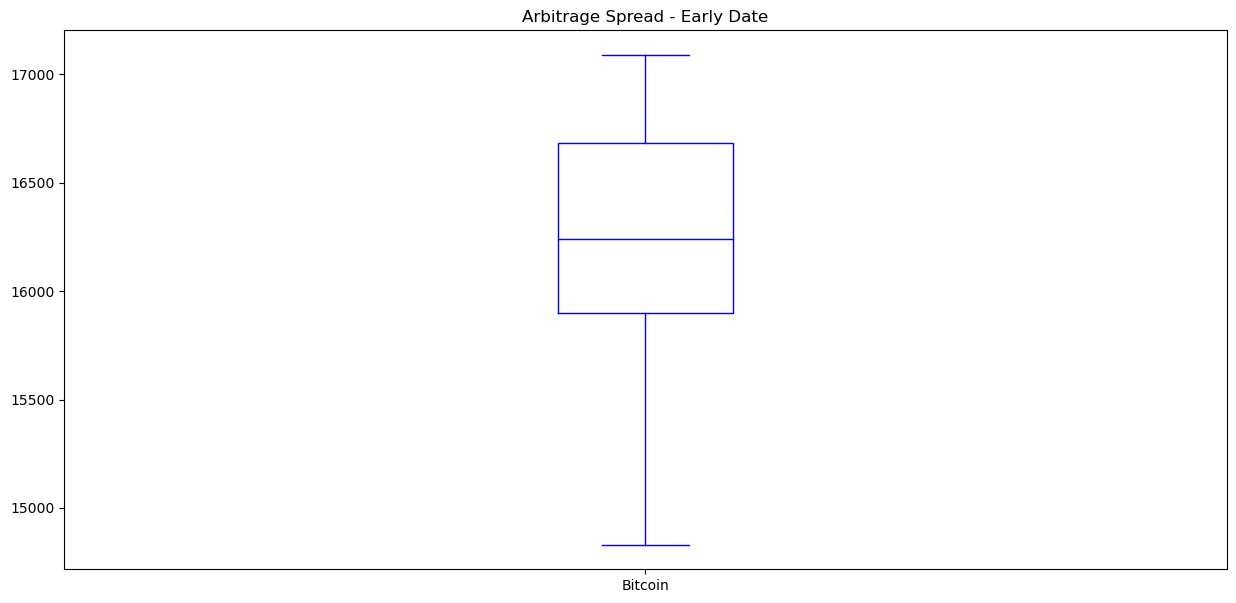

In [32]:
# Visualize the arbitrage spread from early in the dataset in a box plot
bitstamp_sliced['Close'].loc['2018-01-05'].plot.box(legend=True, figsize=(15, 7),
                         title="Arbitrage Spread - Early Date", color="blue", label="Bitcoin")

<AxesSubplot:title={'center':'Bitcoin and Coinbase Overlay Plot for February 5th'}, xlabel='Timestamp'>

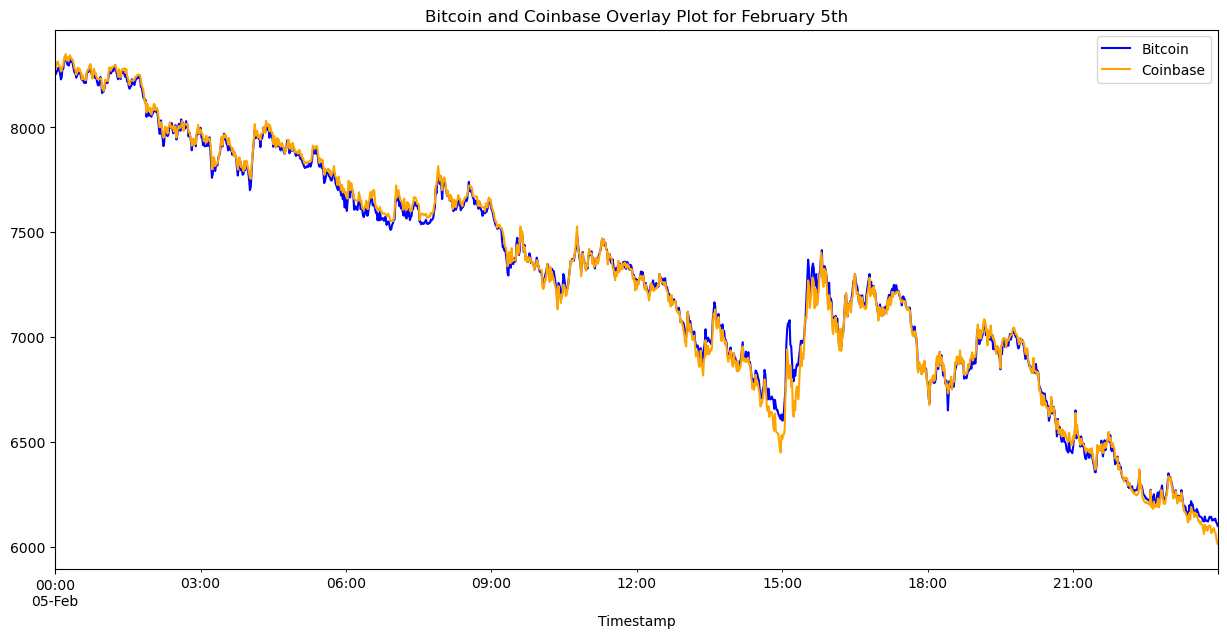

In [28]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp_sliced['Close'].loc['2018-02-05'].plot(legend=True, figsize=(15, 7), 
                title="Bitcoin and Coinbase Overlay Plot for February 5th", color="blue", label="Bitcoin")
coinbase_sliced['Close'].loc['2018-02-05'].plot(legend=True, figsize=(15, 7), 
                                color="orange", label="Coinbase")

In [29]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced['Close'].loc['2018-02-05'] - coinbase_sliced['Close'].loc['2018-02-05']

# Generate summary statistics for the early DataFrame
arbitrage_spread_middle.describe()

count    1440.000000
mean        1.253743
std        33.429441
min       -80.990000
25%       -19.562500
50%        -3.470000
75%        15.012500
max       254.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date'}>

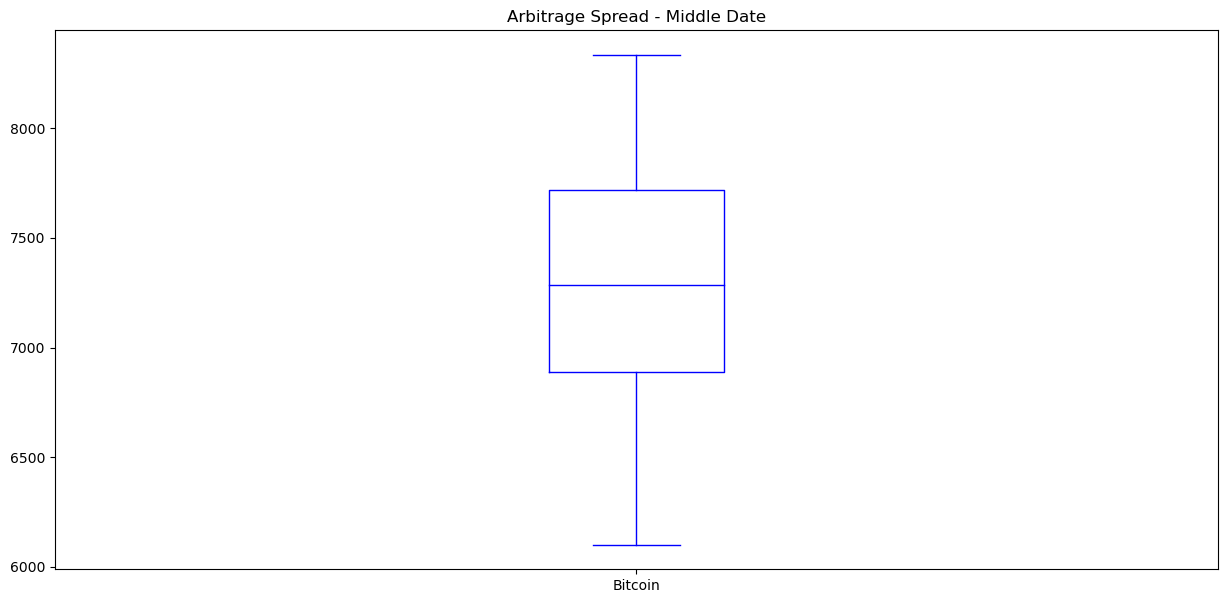

In [31]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
bitstamp_sliced['Close'].loc['2018-02-05'].plot.box(legend=True, figsize=(15, 7),
                         title="Arbitrage Spread - Middle Date", color="blue", label="Bitcoin")

<AxesSubplot:title={'center':'Bitcoin and Coinbase Overlay Plot for March 5th'}, xlabel='Timestamp'>

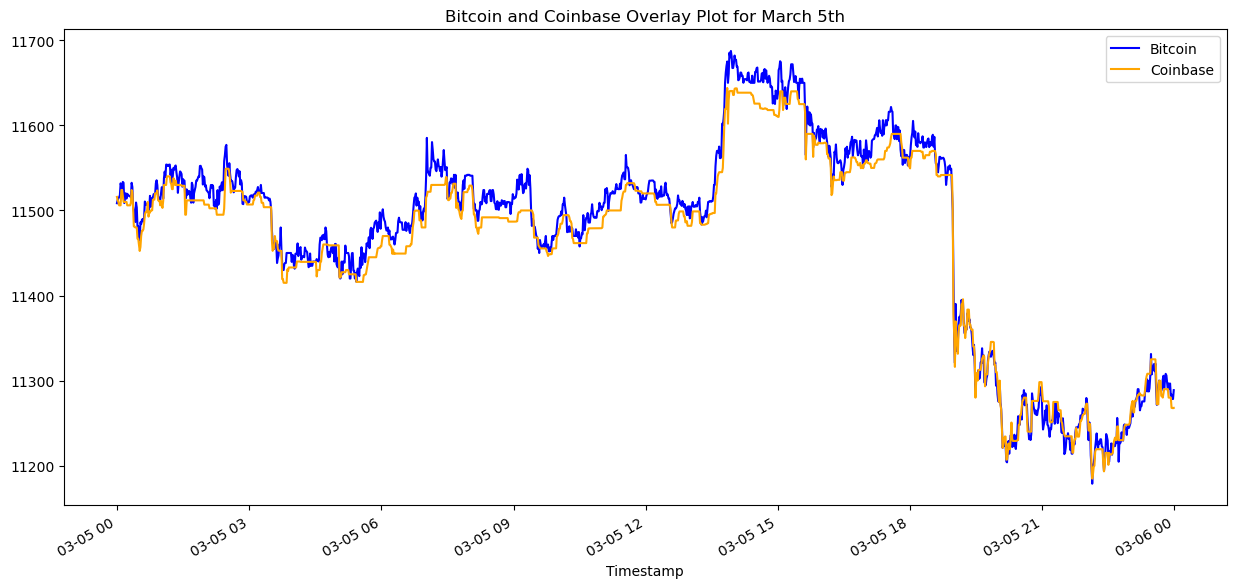

In [45]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-03-05'].plot(legend=True, figsize=(15, 7), 
                title="Bitcoin and Coinbase Overlay Plot for March 5th", color="blue", label="Bitcoin")
coinbase_sliced['Close'].loc['2018-03-05'].plot(legend=True, figsize=(15, 7), 
                                color="orange", label="Coinbase")

In [ ]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced['Close'].loc['2018-03-05'] - coinbase_sliced['Close'].loc['2018-03-05']

# Generate summary statistics for the early DataFrame
arbitrage_spread_late.describe()

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date'}>

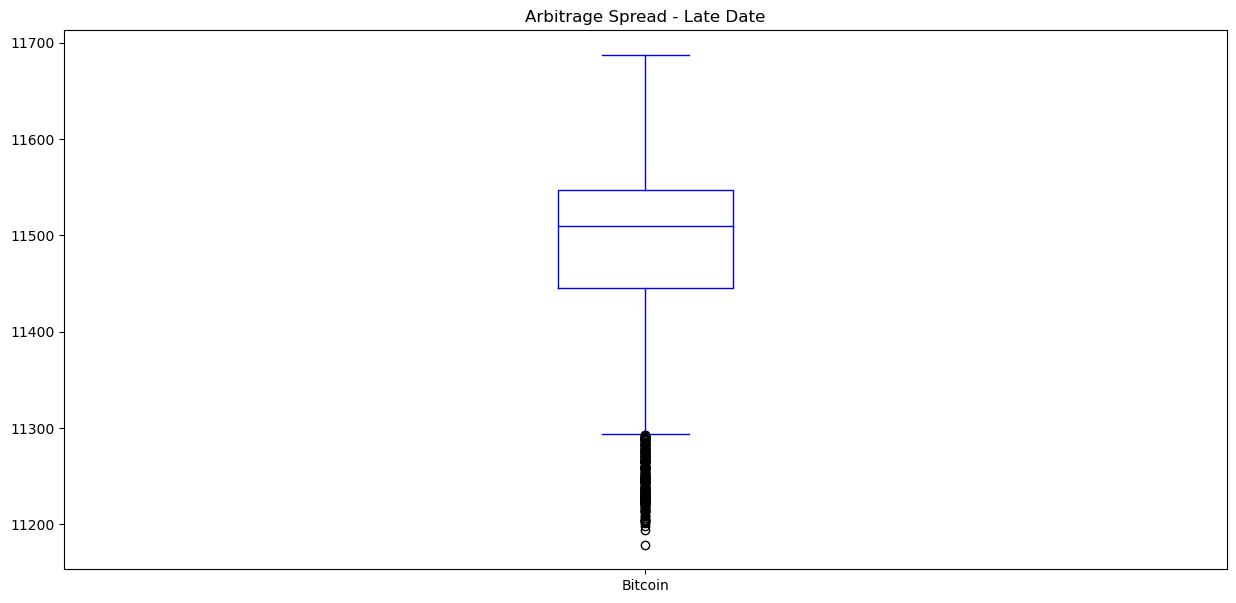

In [33]:
# Visualize the arbitrage spread from late in the dataset in a box plot
bitstamp_sliced['Close'].loc['2018-03-05'].plot.box(legend=True, figsize=(15, 7),
                         title="Arbitrage Spread - Late Date", color="blue", label="Bitcoin")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [34]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced['Close'].loc['2018-01-05'] - coinbase_sliced['Close'].loc['2018-01-05']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       -0.650535
std        44.027768
min      -150.850000
25%       -26.000000
50%         0.055000
75%        24.477500
max       216.930000
Name: Close, dtype: float64

In [35]:
#middle arbi
arbitrage_spread_middle = bitstamp_sliced['Close'].loc['2018-02-05'] - coinbase_sliced['Close'].loc['2018-02-05']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle.describe()

count    1440.000000
mean        1.253743
std        33.429441
min       -80.990000
25%       -19.562500
50%        -3.470000
75%        15.012500
max       254.000000
Name: Close, dtype: float64

In [36]:
arbitrage_spread_late = bitstamp_sliced['Close'].loc['2018-03-05'] - coinbase_sliced['Close'].loc['2018-03-05']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late.describe()

count    1437.000000
mean       11.817683
std        14.276780
min       -33.180000
25%         2.940000
50%        11.500000
75%        20.470000
max        68.280000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [37]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_sliced['Close'].loc['2018-01-05']

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-05 00:00:00    0.000401
2018-01-05 00:01:00    0.001613
2018-01-05 00:02:00    0.000470
2018-01-05 00:03:00    0.001076
2018-01-05 00:04:00         NaN
                         ...   
2018-01-05 23:55:00    0.002544
2018-01-05 23:56:00    0.003144
2018-01-05 23:57:00    0.002029
2018-01-05 23:58:00    0.001982
2018-01-05 23:59:00    0.002426
Name: Close, Length: 1440, dtype: float64

In [38]:
#middle data
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_sliced['Close'].loc['2018-02-05']

spread_return_middle

Timestamp
2018-02-05 00:00:00         NaN
2018-02-05 00:01:00         NaN
2018-02-05 00:02:00         NaN
2018-02-05 00:03:00         NaN
2018-02-05 00:04:00         NaN
                         ...   
2018-02-05 23:55:00    0.008356
2018-02-05 23:56:00    0.010832
2018-02-05 23:57:00    0.010943
2018-02-05 23:58:00    0.014413
2018-02-05 23:59:00    0.014298
Name: Close, Length: 1440, dtype: float64

In [39]:
#late data
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_sliced['Close'].loc['2018-03-05']

spread_return_late

Timestamp
2018-03-05 00:00:00         NaN
2018-03-05 00:01:00    0.000031
2018-03-05 00:02:00    0.000412
2018-03-05 00:03:00    0.000802
2018-03-05 00:04:00    0.001052
                         ...   
2018-03-05 23:55:00    0.000203
2018-03-05 23:56:00    0.001391
2018-03-05 23:57:00    0.000928
2018-03-05 23:58:00    0.000966
2018-03-05 23:59:00    0.001850
Name: Close, Length: 1437, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [83]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]


# Review the first five profitable trades
profitable_trades_early.head(5)

Timestamp
2018-01-05 04:02:00    0.010415
2018-01-05 04:03:00    0.010224
2018-01-05 04:04:00    0.013802
2018-01-05 04:05:00    0.012719
Name: Close, dtype: float64

In [41]:
#middle data
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head(5)

Timestamp
2018-02-05 13:29:00    0.010239
2018-02-05 14:41:00    0.010413
2018-02-05 14:43:00    0.012374
2018-02-05 14:44:00    0.014296
2018-02-05 14:47:00    0.011144
Name: Close, dtype: float64

In [89]:
#late data
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head(20)

# no trades could be profitable above 1%, proven by a missing dataset below

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [47]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    4.000000
mean     0.011790
std      0.001756
min      0.010224
25%      0.010367
50%      0.011567
75%      0.012990
max      0.013802
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [67]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced['Close'].loc['2018-01-05']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.describe()

count    489.000000
mean      43.564315
std       29.992401
min       15.450000
25%       23.830000
50%       34.630000
75%       51.160000
max      216.930000
Name: Close, dtype: float64

In [49]:
profit_middle = profitable_trades_middle * bitstamp_sliced['Close'].loc['2018-02-05']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.describe()

count     51.000000
mean     115.987255
std       43.216256
min       66.440000
25%       87.615000
50%      104.650000
75%      134.715000
max      254.000000
Name: Close, dtype: float64

In [82]:
profit_late = profitable_trades_late * bitstamp_sliced['Close'].loc['2018-3-05']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.describe()

#this day is showing no profits per trade in the count row, this has been proven by functions above too.
# thi could have been a down day for Bitcoin

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [68]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_early = profit_per_trade_early  * bitstamp_sliced['Close'].loc['2018-01-05']

profit_early

Timestamp
2018-01-05 00:00:00            NaN
2018-01-05 00:01:00    361480.5810
2018-01-05 00:02:00            NaN
2018-01-05 00:03:00    240545.5000
2018-01-05 00:04:00            NaN
                          ...     
2018-01-05 23:55:00    698682.6872
2018-01-05 23:56:00    866553.4080
2018-01-05 23:57:00    557205.4406
2018-01-05 23:58:00    544418.1225
2018-01-05 23:59:00    667592.0624
Name: Close, Length: 1440, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early'}, xlabel='Timestamp'>

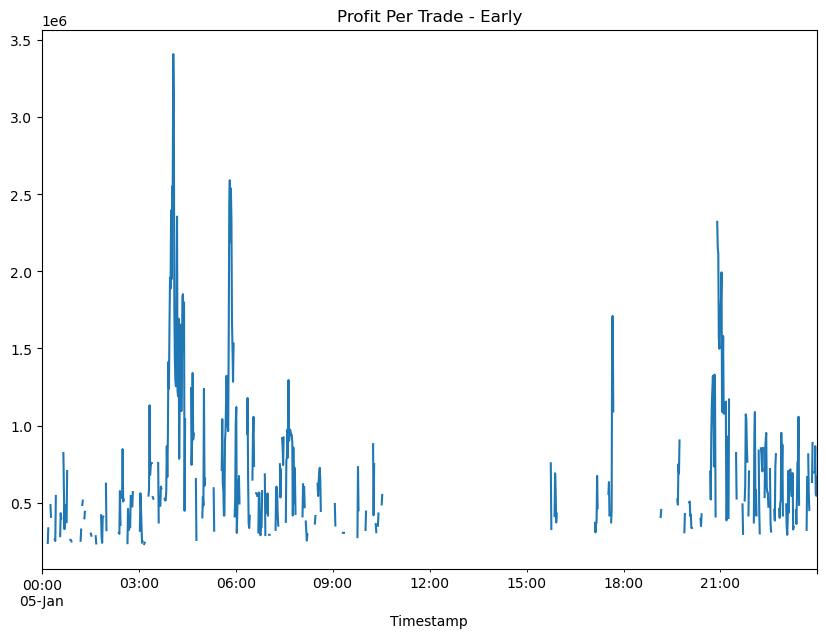

In [69]:
# Plot the results for the early profit per trade DataFrame
profit_early.plot(figsize=(10, 7), title="Profit Per Trade - Early") #xlabel='Timestamp'

In [73]:
# Generate the summary statistics for the early profit per trade DataFrame
#profit_early = profit_per_trade_early  * bitstamp_sliced.plot["Close"].loc['2018-01-05']
profit_early.dropna()
profit_early.describe()

count    4.890000e+02
mean     7.008908e+05
std      4.843868e+05
min      2.319663e+05
25%      3.828135e+05
50%      5.444181e+05
75%      8.510644e+05
max      3.409474e+06
Name: Close, dtype: float64

In [90]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_middle = profit_per_trade_middle  * bitstamp_sliced['Close'].loc['2018-02-05']

profit_middle

Timestamp
2018-02-05 00:00:00            NaN
2018-02-05 00:01:00            NaN
2018-02-05 00:02:00            NaN
2018-02-05 00:03:00            NaN
2018-02-05 00:04:00            NaN
                          ...     
2018-02-05 23:55:00            NaN
2018-02-05 23:56:00    407535.6516
2018-02-05 23:57:00    409600.7695
2018-02-05 23:58:00    538133.2403
2018-02-05 23:59:00    532050.7220
Name: Close, Length: 1440, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Middle'}, xlabel='Timestamp'>

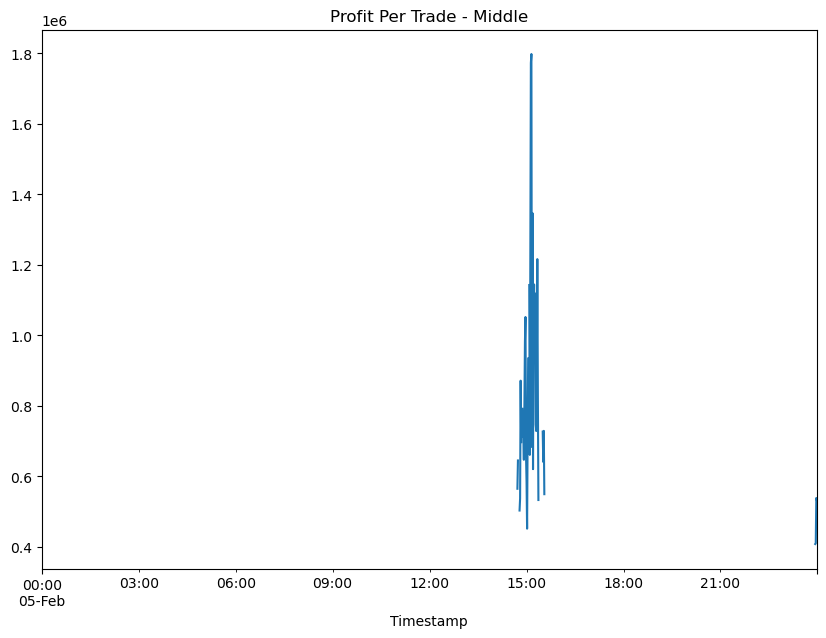

In [91]:
# Plot the results for the Middle profit per trade DataFrame
profit_middle.plot(figsize=(10, 7), title="Profit Per Trade - Middle")

In [92]:
# Generate the summary statistics
profit_middle.dropna()
profit_middle.describe()

count    5.100000e+01
mean     7.913847e+05
std      3.083832e+05
min      4.075357e+05
25%      5.742131e+05
50%      7.229119e+05
75%      9.091561e+05
max      1.798320e+06
Name: Close, dtype: float64

In [93]:
# Generate the summary statistics for the Late profit per trade DataFrame
profit_late = profit_per_trade_late  * bitstamp_sliced['Close'].loc['2018-03-05']

profit_late

Timestamp
2018-03-05 00:00:00   NaN
2018-03-05 00:01:00   NaN
2018-03-05 00:02:00   NaN
2018-03-05 00:03:00   NaN
2018-03-05 00:04:00   NaN
                       ..
2018-03-05 23:55:00   NaN
2018-03-05 23:56:00   NaN
2018-03-05 23:57:00   NaN
2018-03-05 23:58:00   NaN
2018-03-05 23:59:00   NaN
Name: Close, Length: 1437, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Late'}, xlabel='Timestamp'>

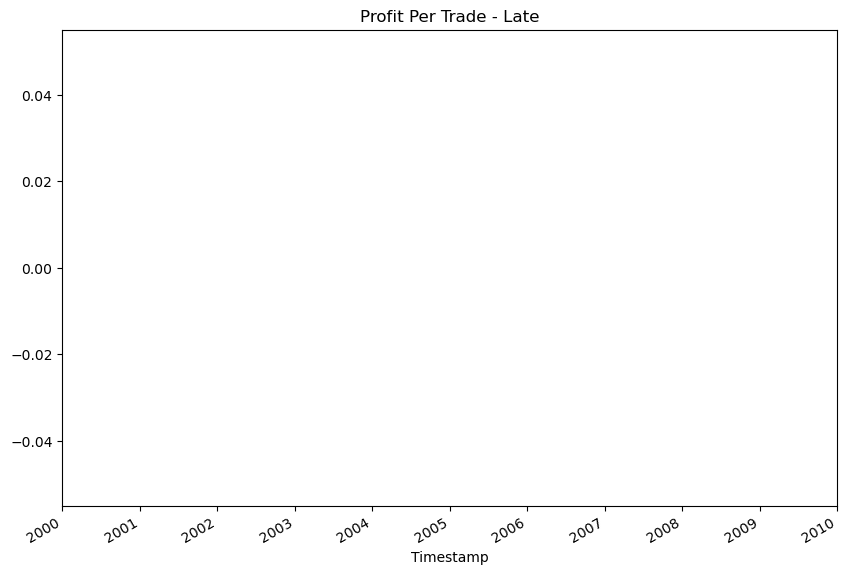

In [94]:
# Plot the results for the Late profit per trade DataFrame
profit_late.plot(figsize=(10, 7), title="Profit Per Trade - Late")

In [95]:
# Generate the summary statistics
profit_late.dropna()
profit_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [109]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

21302.95000000002

In [111]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

5915.350000000004

In [112]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

#not a good day to trade as you can see from the sum of profit

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [102]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Early'}, xlabel='Timestamp'>

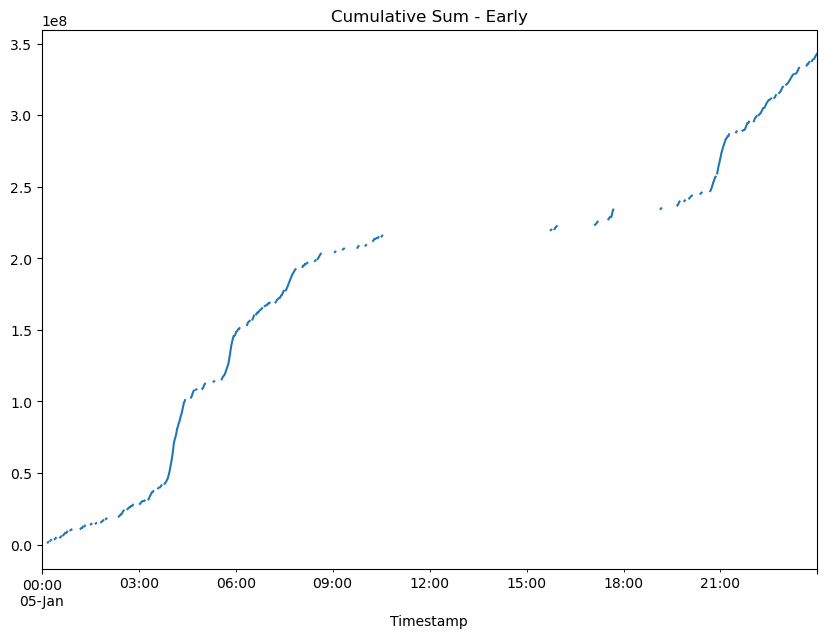

In [103]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Sum - Early")

In [104]:
#middle date
cumulative_profit_middle = profit_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Middle'}, xlabel='Timestamp'>

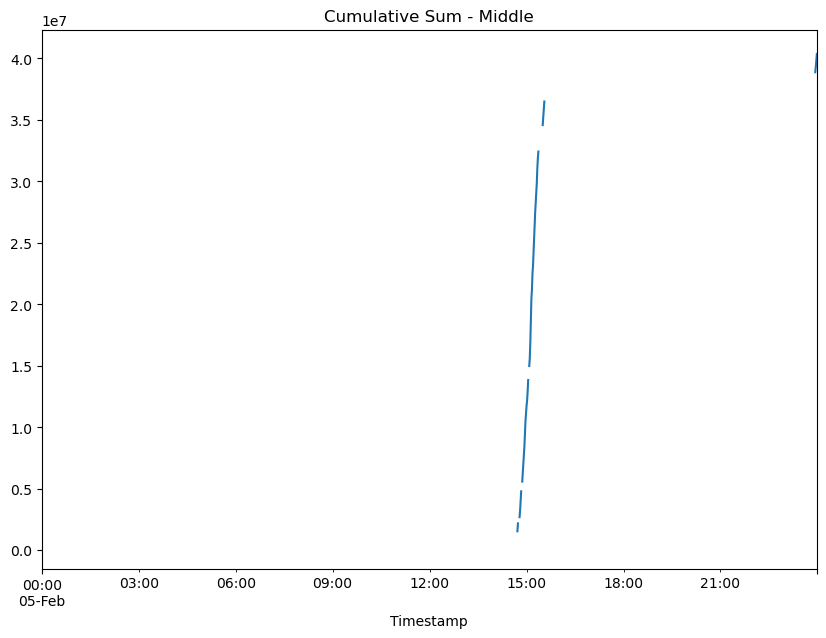

In [105]:
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Sum - Middle")

In [106]:
#late date
cumulative_profit_late = profit_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Late'}, xlabel='Timestamp'>

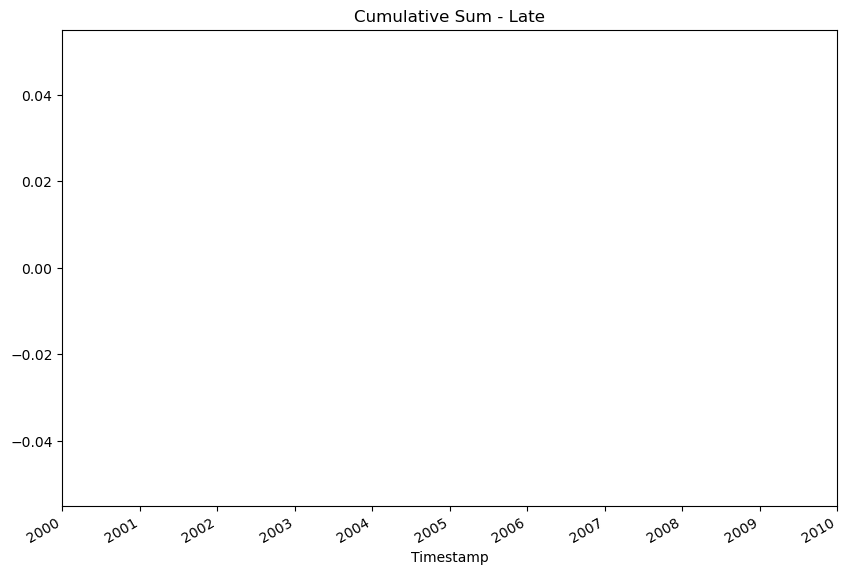

In [107]:
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Sum - Late")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** 

After observing the trading and arbitrage opportunities between bitstamp and coinbase it is clear to see that the opportunities have decreased overtime. In the early date selected for this analysis we can observe, in terms of dollars and multiple timestamps where a significant amount of profit is likely to be made. In the middle date selected by myself for this analysis we can observe less than half of the possible profit amount from the early date selected, further backing my observation that overtime opportunities for profit decrease. Where we really begin to see the decrease occur and opportunities for profit almost disappear is in the late date that I selected for this analysis. The late date showed none, not even a single timestamp where a profit_per_trade would be above 1%. This further backs my initial observation that arbitrage opportunities between bitstamp and coinbase have decreased overtime.